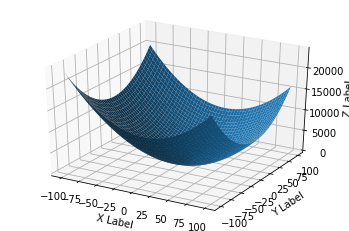

<a list of 5 text.Text objects>

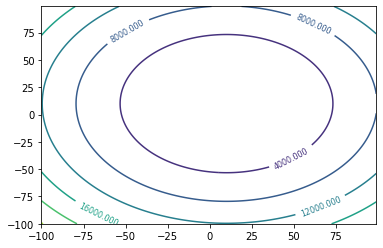

In [4]:
#plotting the 3D function
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
w1 = np.arange(-100.0, 100.0, 1)
w2 = np.arange(-100.0, 100.0, 1)
# The following will print a 3D surface
W1,W2=np.meshgrid(w1,w2) #Forming MeshGrid
J = (W1-10) **2 + (W2-10) ** 2
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, J)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()
#plotting the contour plot
fig = plt.figure()
cp  = plt.contour(W1, W2, J)
plt.clabel(cp, fontsize=8)

6.200000000000004 , 11.5 is the minimum point with value 16.68999999999997
Yes indeed the minima found is correct


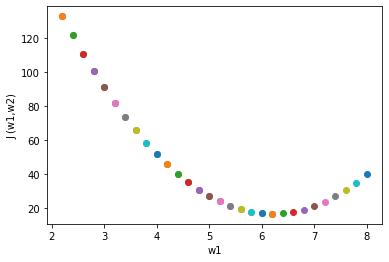

In [5]:
#Unidirectional search, start point(2,1), direction of search is (2,5) 
# TAKING CONSTANT ALPHA
import matplotlib.pyplot as plt
def J(w1,w2):
    return (w1-10) **2 + (w2-10) ** 2
w_old1 = 2
w_old2= 1
alpha = 0.1
w_new1 = w_old1 + 2*alpha
w_new2 = w_old2 + 5*alpha
while (J(w_new1, w_new2)<J(w_old1, w_old2)):
    #print(J(w_new1, w_new2))
    #print(w_new1, w_new2)
    #print("\n")
    plt.plot(w_new1, J(w_new1, w_new2),'o')
    w_old1, w_old2 = w_new1, w_new2
    w_new1 = w_old1 + 2*alpha
    w_new2 = w_old2 + 5*alpha
plt.xlabel('w1')
plt.ylabel("J (w1,w2)")
print(w_old1,",", w_old2, "is the minimum point with value",J(w_old1, w_old2)) 

# Cross checking the values beyond the minimum point
w_old1 = 2
w_old2= 1
alpha = 0.1
w_new1 = w_old1 + 2*alpha
w_new2 = w_old2 + 5*alpha
for i in range(30):
    plt.plot(w_new1, J(w_new1, w_new2),'o')
    w_old1, w_old2 = w_new1, w_new2
    w_new1 = w_old1 + 2*alpha
    w_new2 = w_old2 + 5*alpha
plt.xlabel('w1')
plt.ylabel("J (w1,w2)")
print("Yes indeed the minima found is correct")
#as can be seen J value increases beyond the minima

In [2]:
def find_f_sv(f_mv, start, drx):
    def parametric(alpha):
        return f_mv(*(start + alpha*drx))
    return parametric

def exhaustive_search(obj, a=-100, b=100, n=10):
    x1 = a
    dx = (b - a) / n
    x2 = x1 + dx
    x3 = x2 + dx
    while not (obj(x1) >= obj(x2) and obj(x2) <= obj(x3)):
        x1 = x2
        x2 = x3
        x3 = x2 + dx
        if x3 > b:
            return False
    return (x1, x3)

def interval_halving(obj, a, b, errlim=1e-5):
    while abs(b - a) > errlim:
        xm = (a + b) / 2
        x1 = (a + xm) / 2
        x2 = (xm + b) / 2
        if obj(x1) < obj(xm):
            b, xm = xm, x1
        else:
            if obj(x2) < obj(xm):
                a, xm = xm, x2
            else:
                a, b = x1, x2
    return (a+b)/2
    
#Objective function
def f(w1, w2):
    return (w1 - 10) ** 2 + (w2 - 10) ** 2

    
#Start point
sp = np.array([2, 1])
#Search direction
sd = np.array([2, 5])

# Multivariable optimisation problem converted to single variable optimisation
f_sv = find_f_sv(f, sp, sd)


#Upper and lower bounds of alpha 
a, b = exhaustive_search(f_sv, n=100)
print(a,b)
#optimal value of alpha
alpha_opt = interval_halving(f_sv, a, b)
print(alpha_opt)
# Find the optimal x and y values
x_opt, y_opt = sp + alpha_opt * sd
print(f"Optimal value is {(x_opt, y_opt)}")

0.0 4.0
2.1034469604492188
Optimal value is (6.2068939208984375, 11.517234802246094)


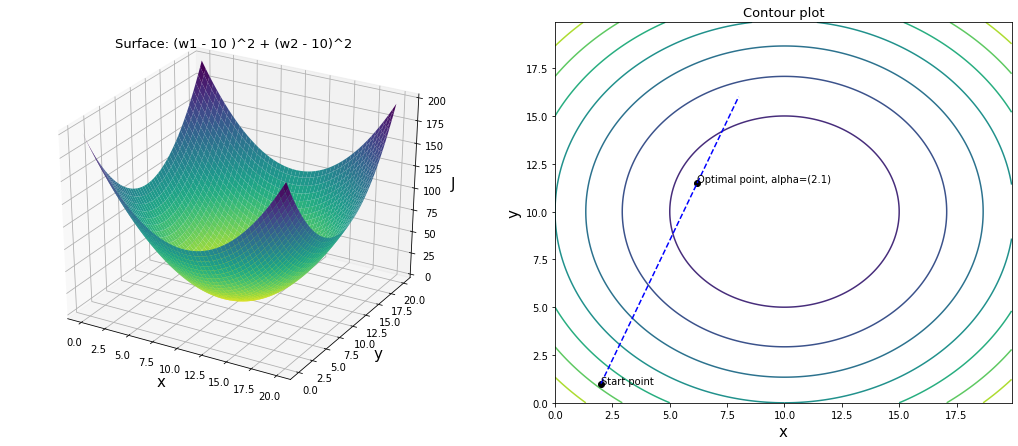

In [3]:
w1 = np.arange(0, 20, 0.1)
w2 = np.arange(0, 20, 0.1)
X, Y = np.meshgrid(w1, w2)
J = f(X,Y)
fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(X, Y, J,cmap='viridis_r')
ax.set_title("Surface: (w1 - 10 )^2 + (w2 - 10)^2 ", fontsize = 13)
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
ax.set_zlabel('J', fontsize = 15)
ax = fig.add_subplot(122)
ax.contour(X, Y, J)
ax.set_title("Contour plot", fontsize = 13)
ax.set_xlabel('x', fontsize = 15)
ax.set_ylabel('y', fontsize = 15)
# Mark start point
ax.plot(*sp, 'ko')
ax.annotate('Start point', sp)
# Mark optimal point
ax.plot(x_opt, y_opt, 'ko')
ax.annotate(f'Optimal point, alpha=({round(alpha_opt, 2)})', (x_opt, y_opt))
# Draw search direction
points = np.array([sp + a*sd for a in range(4)])
ax.plot(points[:, 0], points[:, 1], 'b--')
plt.show()
#The search direction is not gradient descent, minima by hand calculations is (-10,-10).....but along the given direction [2,5]
#the minima is [6.2068939208984375, 11.517234802246094]

